# Clean Up Data

In [15]:
import pandas as pd

prices = pd.read_csv("on_off_peak_prices.csv", encoding="latin1")

# Replace 'year_round' with both 'summer' and 'winter' 
prices_expanded = pd.concat([
    prices,
    prices[prices['season'] == 'year_round'].assign(season='summer'),
    prices[prices['season'] == 'year_round'].assign(season='winter')
])

# Group by state and calculate the maximum values
result = prices_expanded.groupby('state').agg(
    max_winter_price=('w_price', 'max'),
    max_summer_price=('s_price', 'max'),
    max_penalty=('penalty', 'max')
).reset_index()

# Display the resulting dataset
print(result)

# Assuming 'result' is your existing DataFrame
# Create a list of all US states you want to include
all_states = ['KS', 'LA', 'ME', 'NV', 'RI', 'WY']

# Combine the existing states with the new states and sort alphabetically
combined_states = sorted(set(result['state'].tolist() + all_states))

# Reindex the DataFrame to include all states, filling new rows with NaN
result_with_all_states = result.set_index('state').reindex(combined_states).reset_index()

# Sort the DataFrame by state
result_with_all_states = result_with_all_states.sort_values('state')

# Display the resulting dataset
print(result_with_all_states)

# Multiply relevant columns by 1000 to convert from dollars per kW to dollars per MW
result_with_all_states[['max_summer_price', 'max_winter_price', 'max_penalty']] = (
    result_with_all_states[['max_summer_price', 'max_winter_price', 'max_penalty']] * 1000
)

# Display the updated dataset
print(result_with_all_states)

max_prices_and_penalties = result_with_all_states
print(max_prices_and_penalties)

   state  max_winter_price  max_summer_price  max_penalty
0     AK               NaN               NaN          NaN
1     AL               NaN               NaN          NaN
2     AR               NaN               NaN          NaN
3     AZ               NaN            40.000          NaN
4     CA               NaN           175.000          NaN
5     CO               NaN               NaN          NaN
6     CT               NaN           200.000          NaN
7     DC               NaN            20.000          NaN
8     DE               NaN             1.250          NaN
9     FL               NaN             8.700         1.13
10    GA               NaN             1.750          NaN
11    HI             10.00            10.000          NaN
12    IA              8.21             8.210        26.27
13    ID               NaN               NaN          NaN
14    IL               NaN               NaN          NaN
15    IN             42.00            42.000          NaN
16    KY      

# Create Maps

File exists


c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\3134973924.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


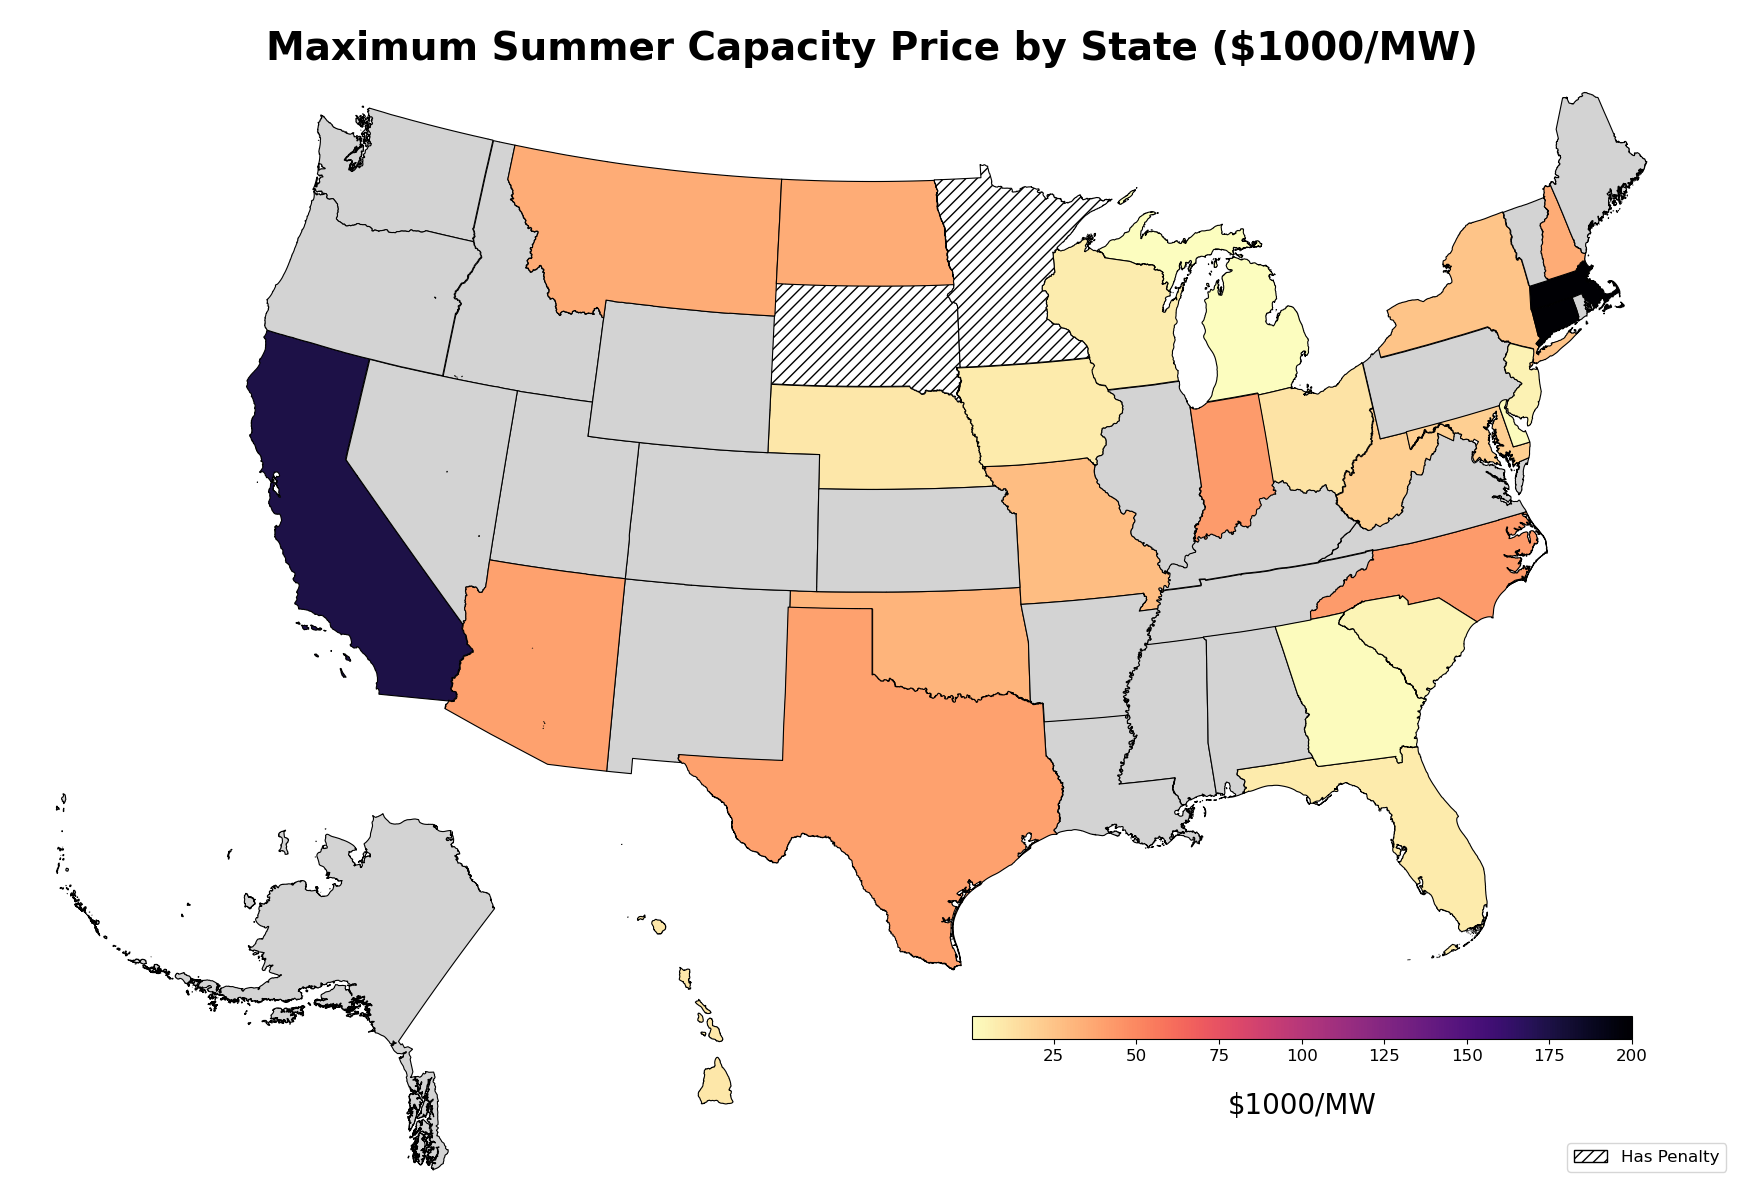

c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\3134973924.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


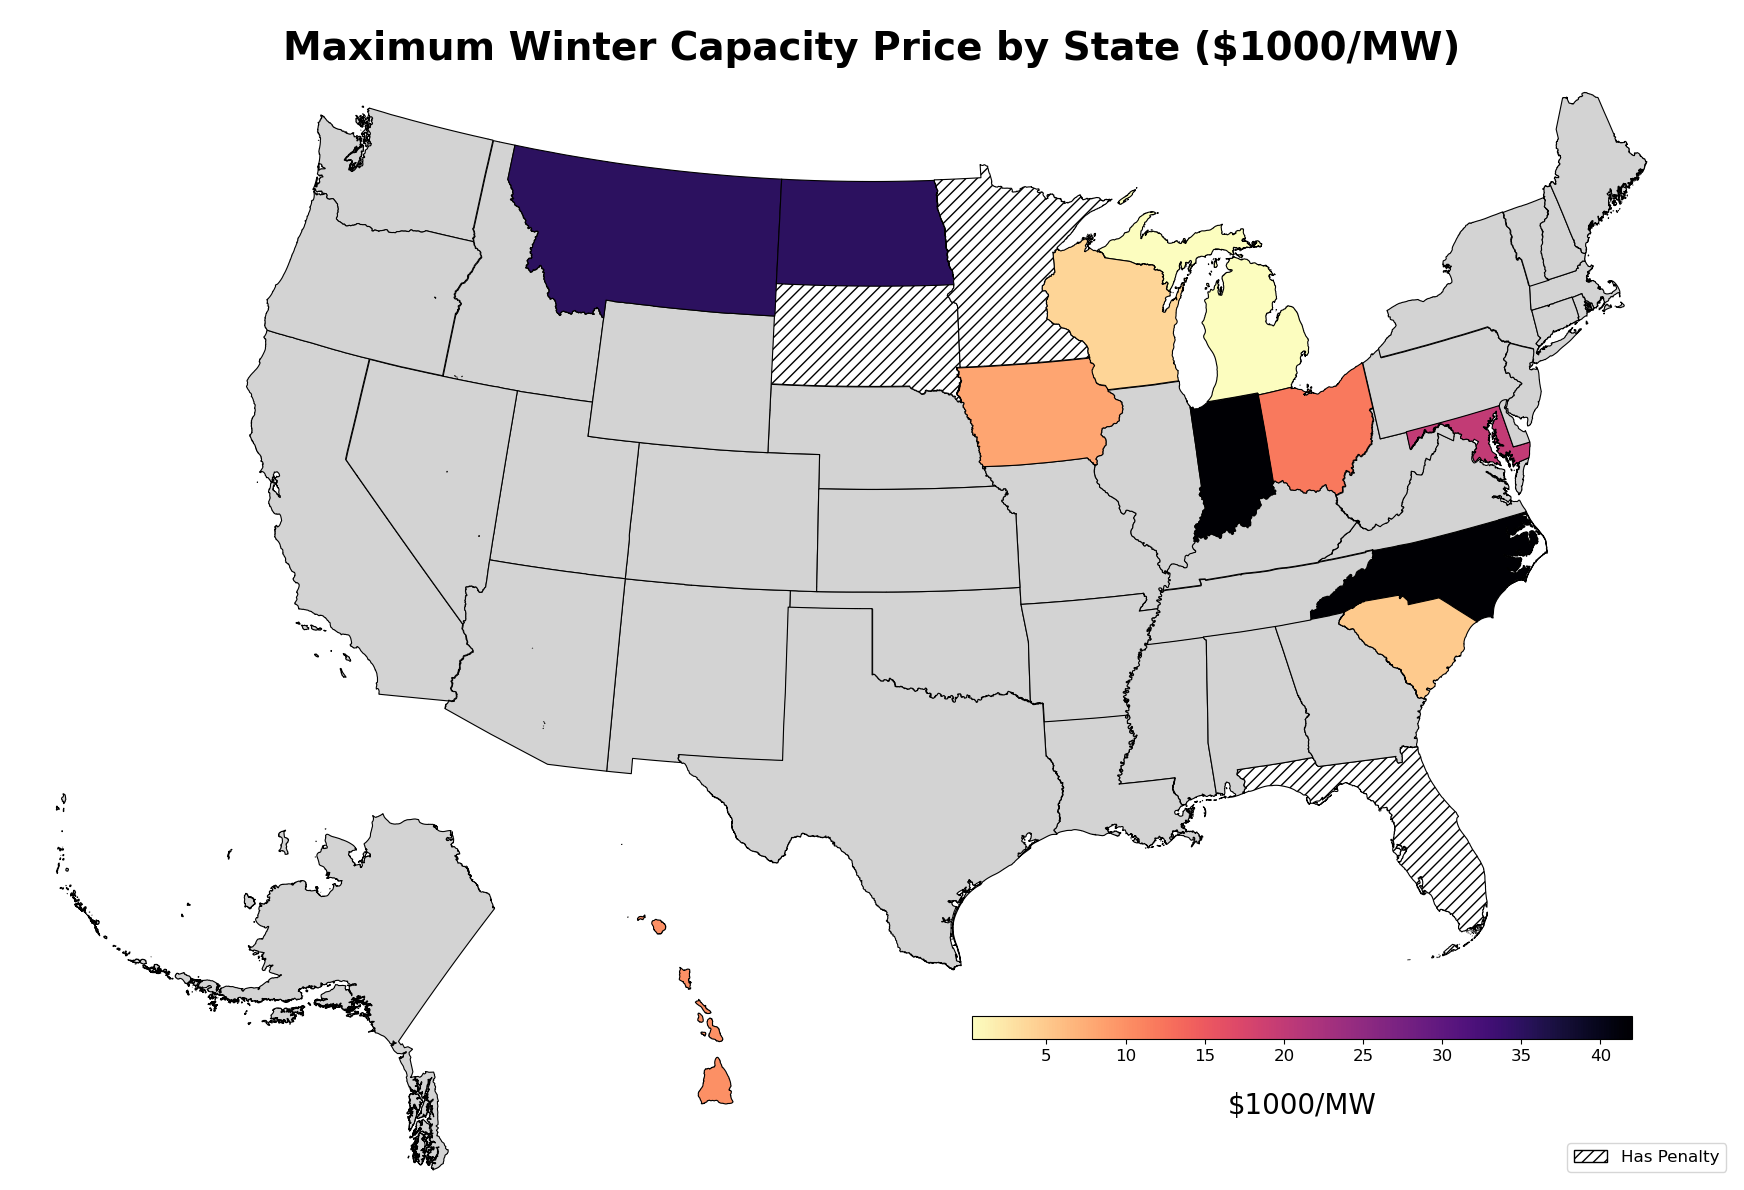

c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\3134973924.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


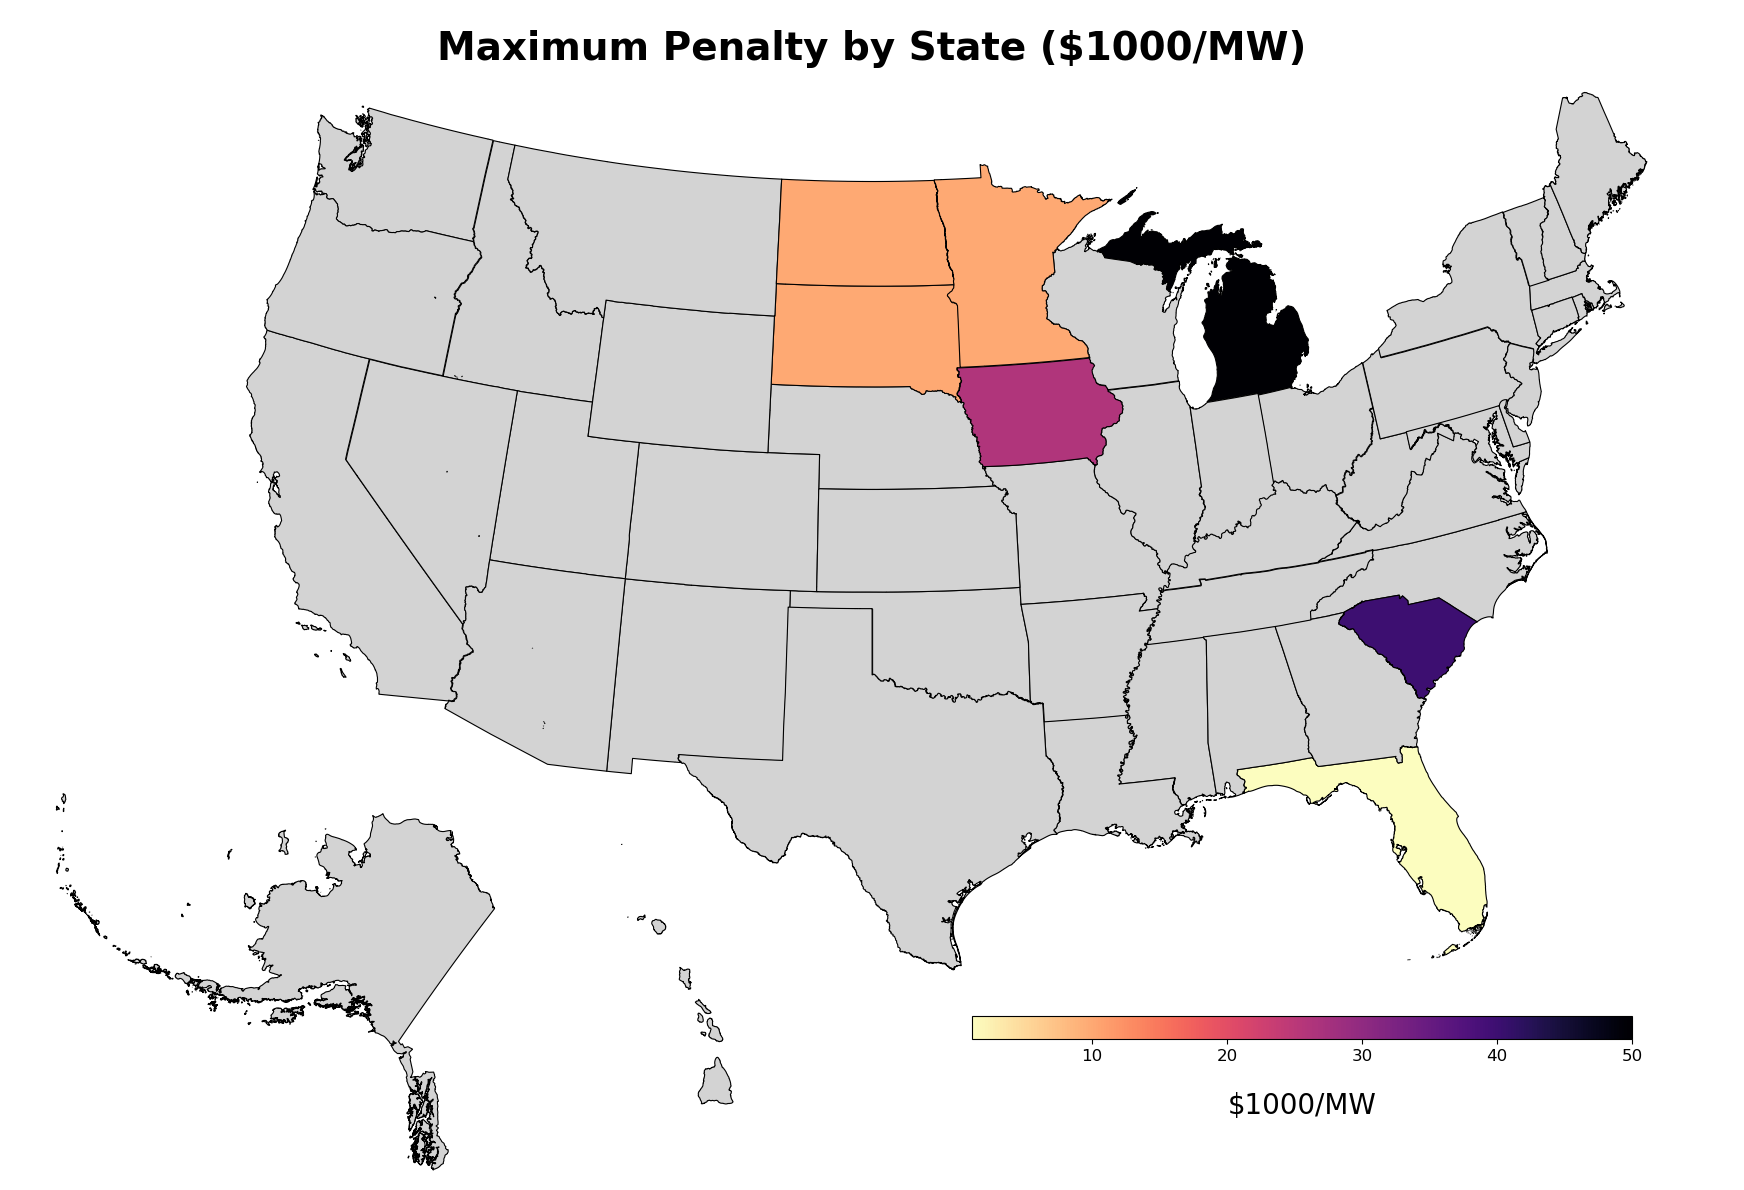

c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\3134973924.py:159: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


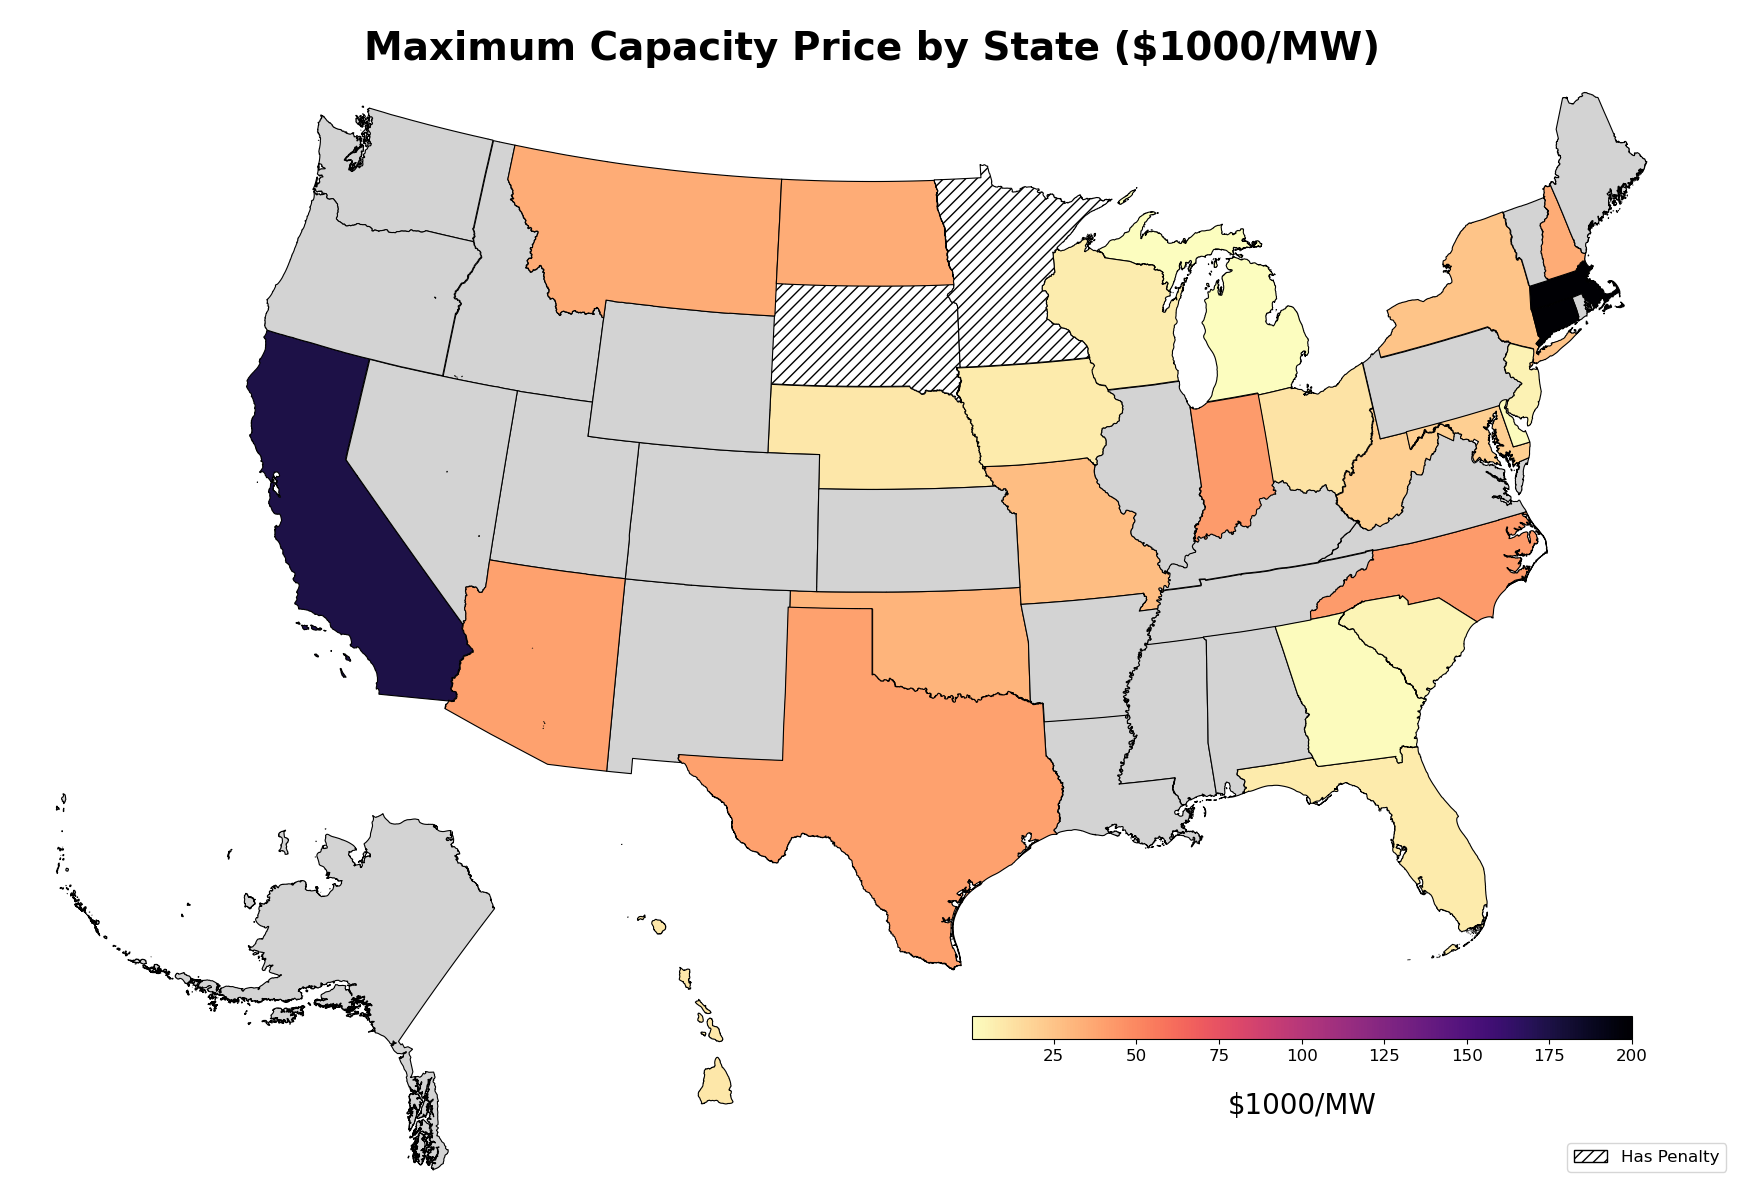

In [156]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Specify the file path
file_path = r"C:\Users\juzzz\Downloads\cb_2018_us_state_500k\cb_2018_us_state_500k.shp"

# Check if the file exists
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")

try:
    # Read the shapefile
    us_states = gpd.read_file(file_path)

    # Remove territories and keep only 50 states
    us_states = us_states[us_states['STUSPS'].isin(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                                                    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                                                    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                                                    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                                                    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])]

    # Assuming `result_with_all_states` has a `state` column with state abbreviations
    # Merge it with the shapefile data
    merged_data = us_states.merge(result_with_all_states, left_on='STUSPS', right_on='state', how='left')

    # Calculate max price regardless of season
    merged_data['max_price'] = merged_data[['max_summer_price', 'max_winter_price']].max(axis=1)

    def makeColorColumn(gdf, variable, vmin, vmax, cmap='viridis'):
        """
        Assign colors to each row in the GeoDataFrame based on a variable.
        """
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
        mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        gdf['value_determined_color'] = gdf[variable].apply(
            lambda x: mcolors.to_hex(mapper.to_rgba(x)) if not np.isnan(x) else '#d3d3d3')  # Light gray for NaN values
        return gdf

    # Scale the relevant columns
    merged_data['max_summer_price'] /= 1000
    merged_data['max_winter_price'] /= 1000
    merged_data['max_penalty'] /= 1000
    merged_data['max_price'] /= 1000

    def add_custom_legend(ax):
        """
        Add a custom legend for hatched states.
        """
        hatch_patch = mpatches.Patch(facecolor='white', hatch='///',
                                     edgecolor='black',
                                     label='Has Penalty')
        ax.legend(handles=[hatch_patch], loc='lower right',
                  fontsize=12)

    def create_map(data, column, title, cmap='viridis'):
        # Set parameters
        variable = column
        vmin, vmax = data[column].min(), data[column].max()
        data = makeColorColumn(data, variable, vmin, vmax, cmap=cmap)

        # Create "visframe" as a re-projected GeoDataFrame using EPSG 2163 for CONUS
        visframe = data.to_crs({'init': 'epsg:2163'})

        # Create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(20, 12))
        ax.axis('off')

        from shapely.affinity import translate   

        # Plot CONUS states (excluding Alaska and Hawaii)
        for row in visframe.itertuples():
            if row.STUSPS not in ['AK', 'HI']:
                vf = visframe[visframe['STUSPS'] == row.STUSPS]
                c = data[data['STUSPS'] == row.STUSPS]['value_determined_color'].iloc[0]
                
                # Check if the state has no price but has a penalty
                if column != "max_penalty" and np.isnan(getattr(row, column)) and not np.isnan(row.max_penalty):
                    vf.plot(ax=ax, facecolor='white',
                            edgecolor='black',
                            linewidth=0.8,
                            hatch='///')
                else:
                    vf.plot(color=c,
                            linewidth=0.8,
                            ax=ax,
                            edgecolor="black")

        # Set limits for continental US
        ax.set_xlim(-2800000, 2800000)
        ax.set_ylim(-2800000, 1000000)

        # Add Alaska (scaled and repositioned)
        alaska = visframe[visframe['STUSPS'] == "AK"].scale(xfact=0.50,
                                                            yfact=0.50,
                                                            origin=(0, 0))
        alaska = alaska.translate(xoff=-470000,
                                  yoff=-3500000)
        if column != "max_penalty" and np.isnan(data[data['STUSPS'] == "AK"][column].iloc[0]) and not np.isnan(data[data['STUSPS'] == "AK"]['max_penalty'].iloc[0]):
            alaska.plot(ax=ax,
                        facecolor="white",
                        edgecolor="black",
                        linewidth=0.8,
                        hatch="///")
        else:
            alaska.plot(color=data[data["STUSPS"] == "AK"]["value_determined_color"].iloc[0],
                        linewidth=0.8,
                        ax=ax,
                        edgecolor="black")

        # Add Hawaii (scaled and repositioned)
        hawaii = visframe[visframe['STUSPS'] == "HI"].scale(xfact=1,
                                                            yfact=1,
                                                            origin=(0, 0))
        hawaii = hawaii.translate(xoff=5000000,
                                  yoff=-1500000)
        if column != "max_penalty" and np.isnan(data[data['STUSPS'] == "HI"][column].iloc[0]) and not np.isnan(data[data['STUSPS'] == "HI"]['max_penalty'].iloc[0]):
            hawaii.plot(ax=ax,
                        facecolor="white",
                        edgecolor="black",
                        linewidth=0.8,
                        hatch="///")
        else:
            hawaii.plot(color=data[data["STUSPS"] == "HI"]["value_determined_color"].iloc[0],
                        linewidth=0.8,
                        ax=ax,
                        edgecolor="black")

        # Add a title to the map
        ax.set_title(f"{title} ($1000/MW)", fontsize=28,
                     y=0.95,
                     x=0.5,
                     fontweight="bold")

        # Add colorbar legend to the side
        sm = plt.cm.ScalarMappable(cmap=cmap,
                                   norm=mcolors.Normalize(vmin=vmin,
                                                          vmax=vmax))
        sm._A = []
        cbar_ax = fig.add_axes([0.55, 0.13, 0.33, 0.019])
        cbar = fig.colorbar(sm,
                            cax=cbar_ax,
                            orientation="horizontal")
        cbar.set_label("$1000/MW", rotation=0,
                       labelpad=20,
                       fontsize=20)
        
        cbar.ax.tick_params(labelsize=12)

        # Add custom legend for hatched states (if applicable)
        if column != "max_penalty":
            add_custom_legend(ax)

        plt.tight_layout()
        plt.show()

    # Create maps with updated titles and scaled values
    create_map(merged_data, "max_summer_price", "Maximum Summer Capacity Price by State", cmap="magma_r")
    create_map(merged_data, "max_winter_price", "Maximum Winter Capacity Price by State", cmap="magma_r")
    create_map(merged_data, "max_penalty", "Maximum Penalty by State", cmap="magma_r")
    create_map(merged_data, "max_price", "Maximum Capacity Price by State", cmap="magma_r")

except Exception as e:
    print(f"Error: {str(e)}")


File exists


c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\107790270.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


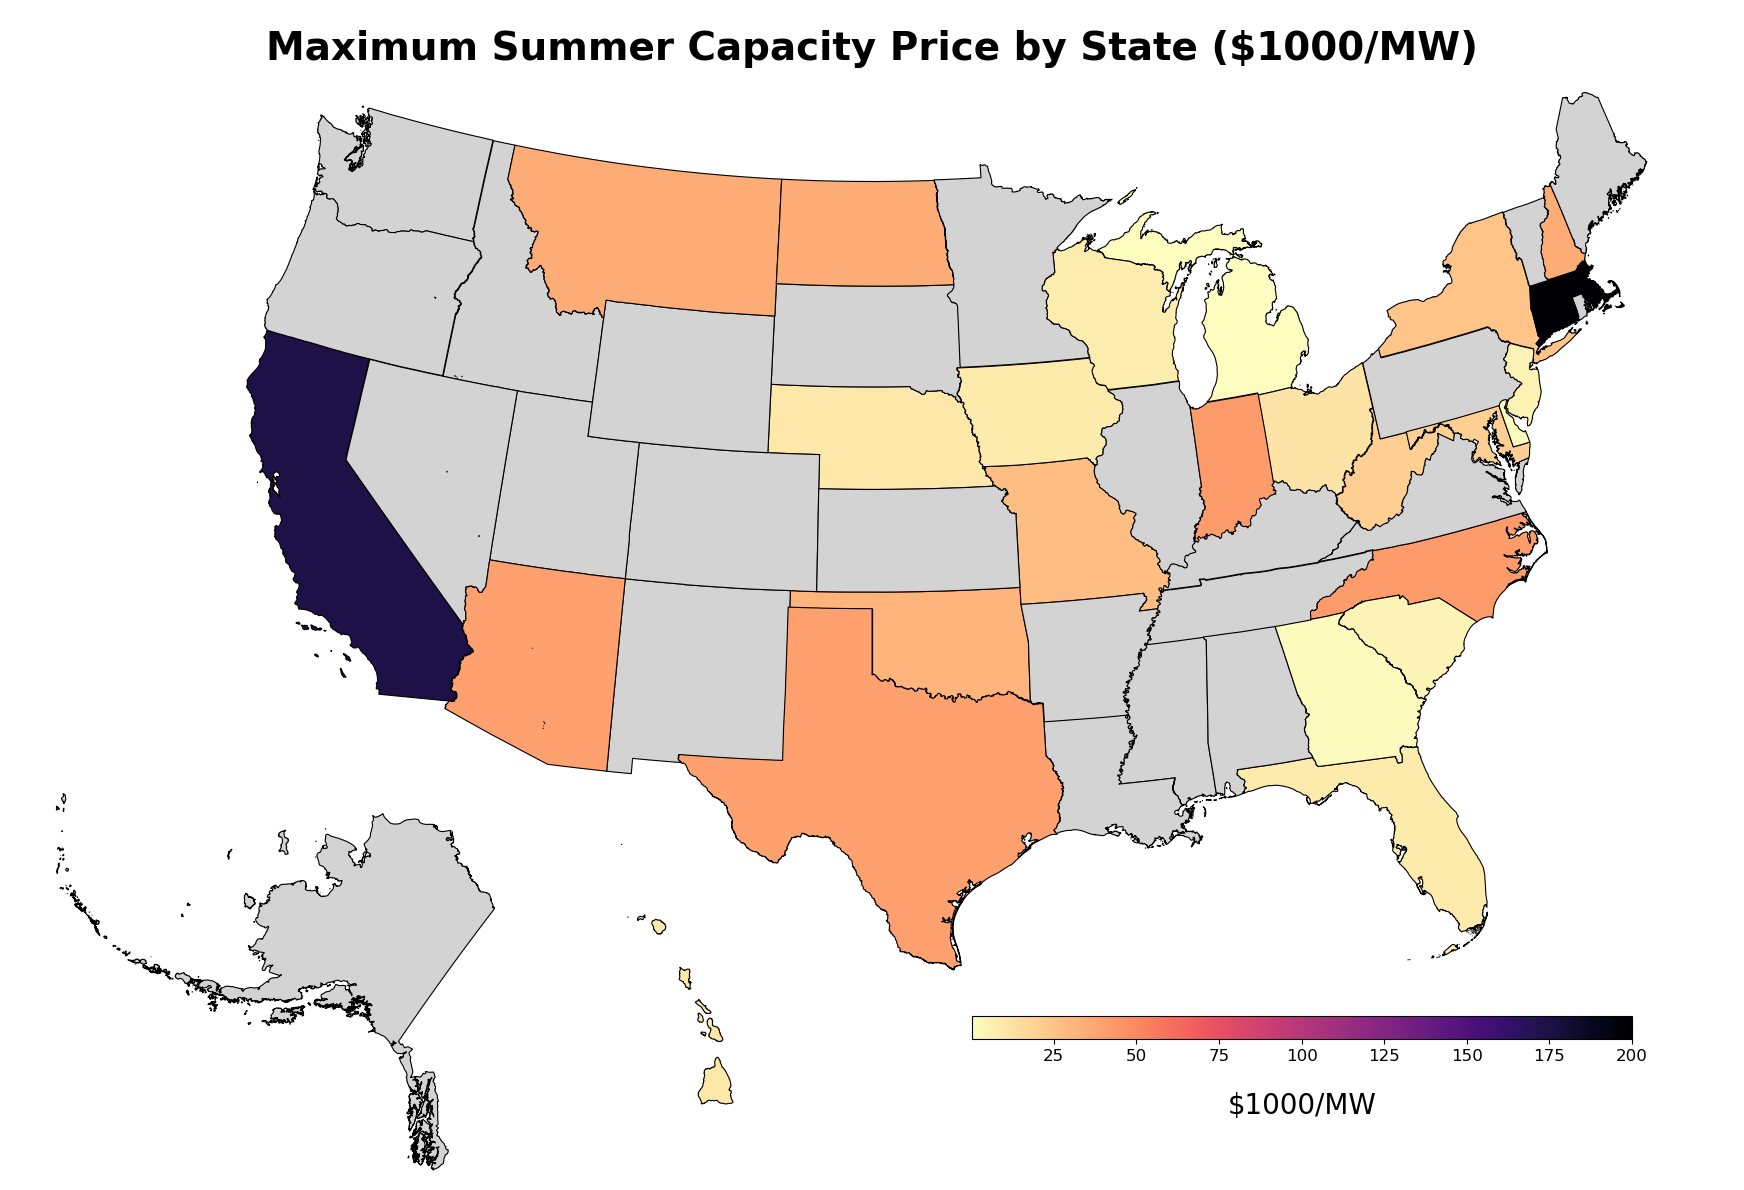

c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\107790270.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


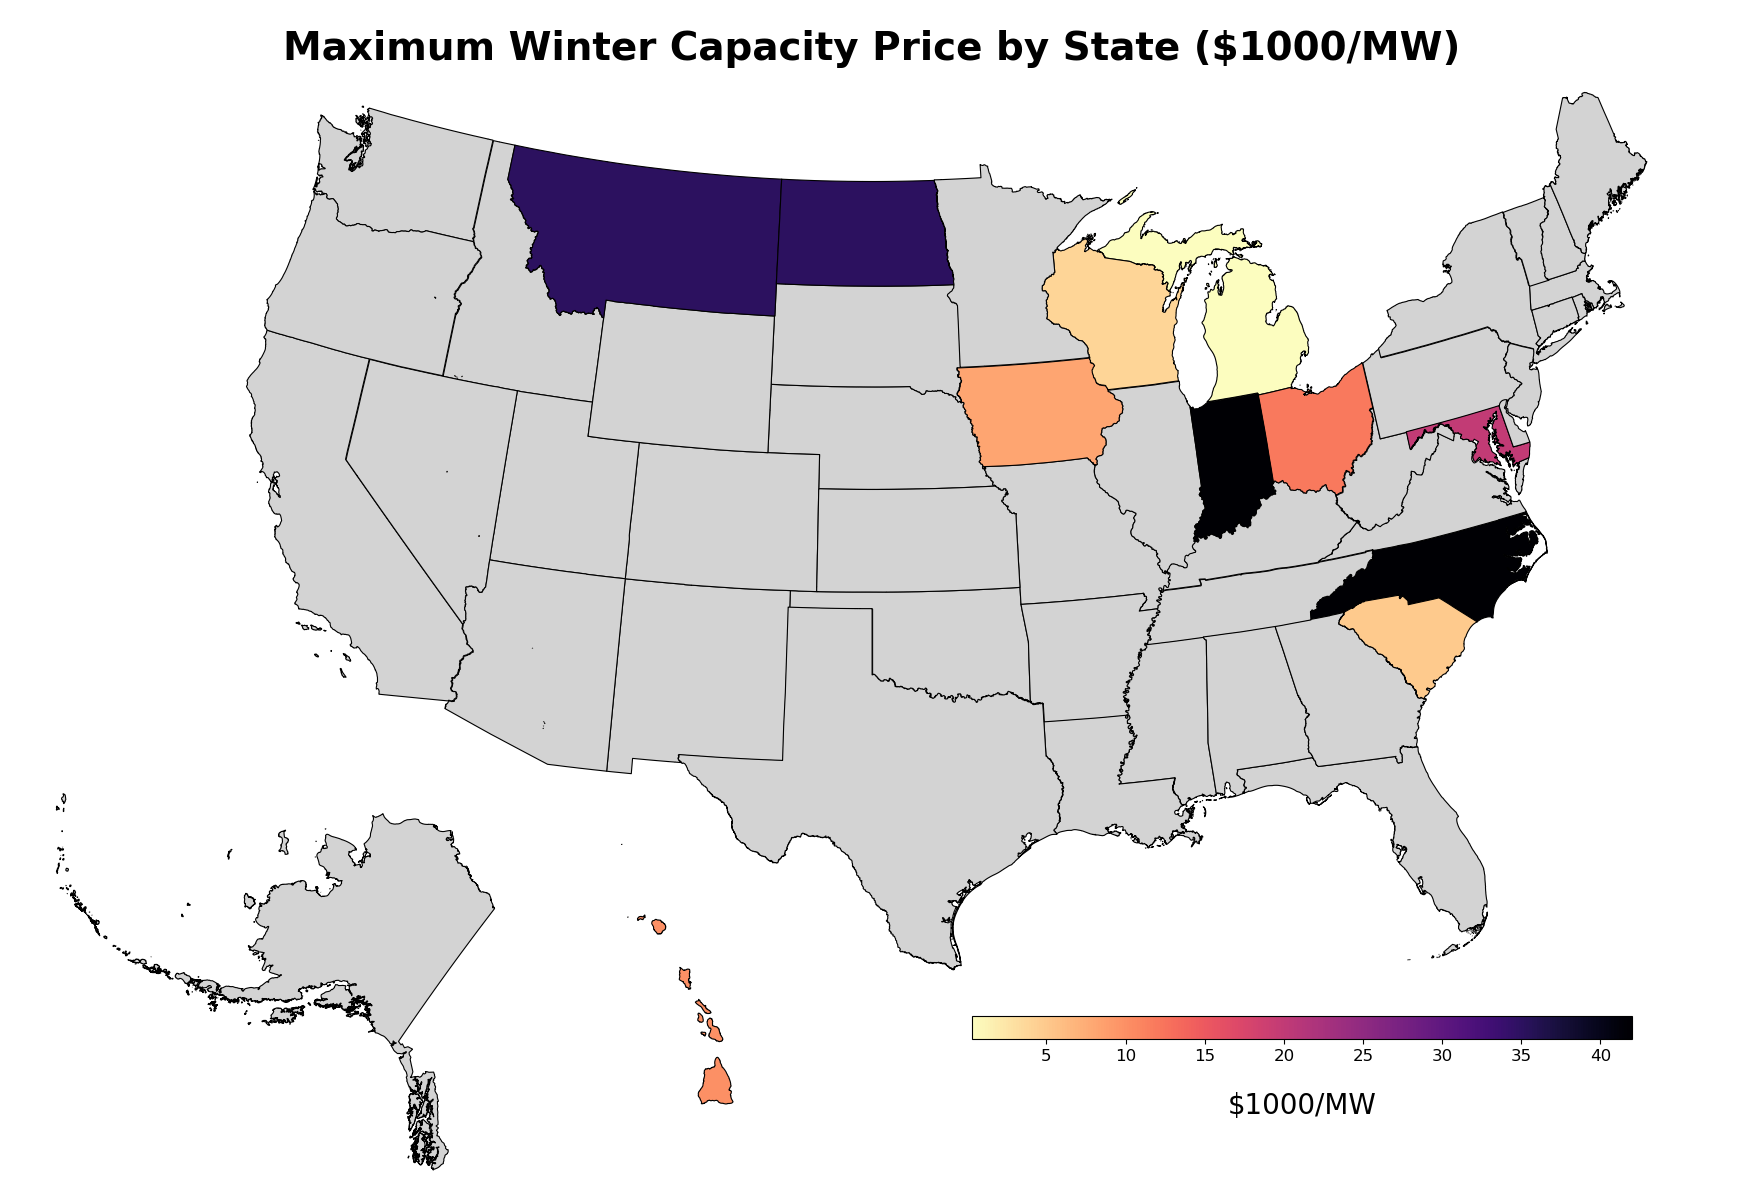

c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\107790270.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


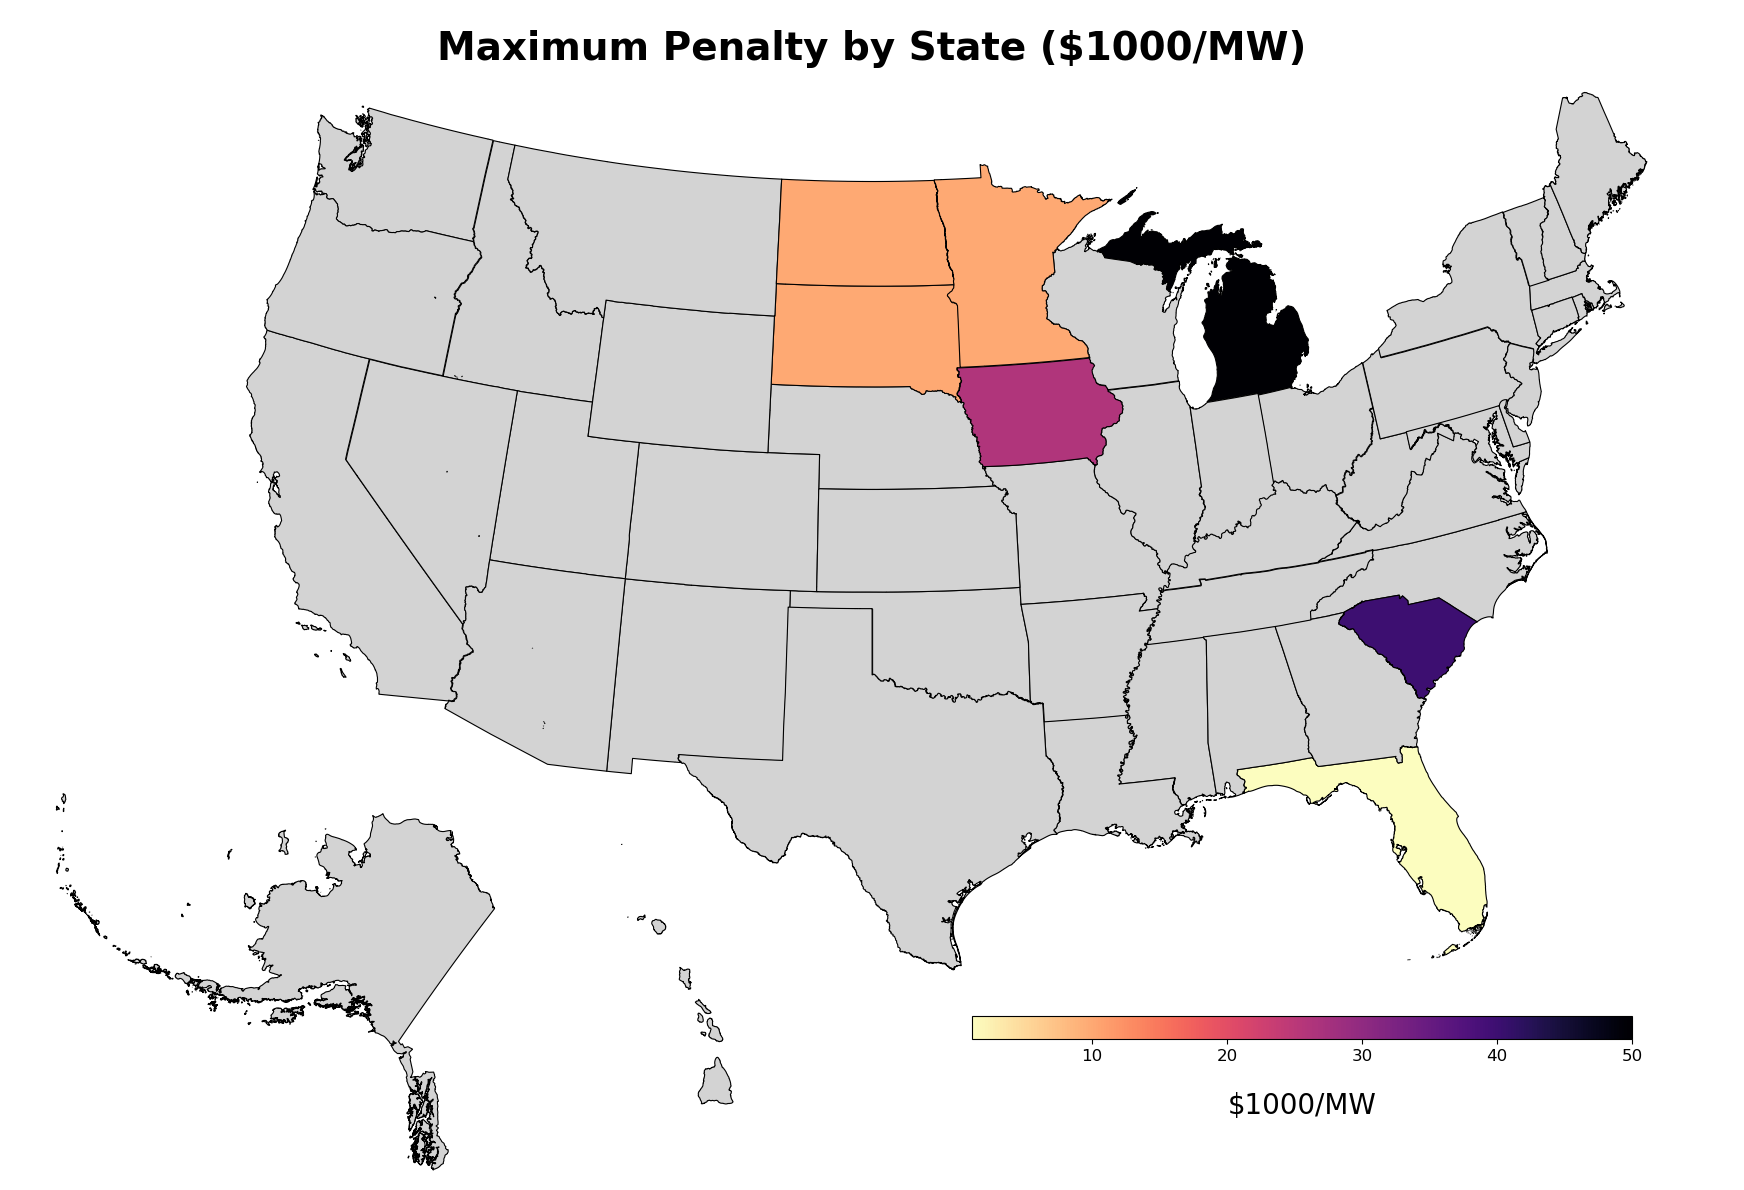

c:\Users\juzzz\miniconda3\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\juzzz\AppData\Local\Temp\ipykernel_13084\107790270.py:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


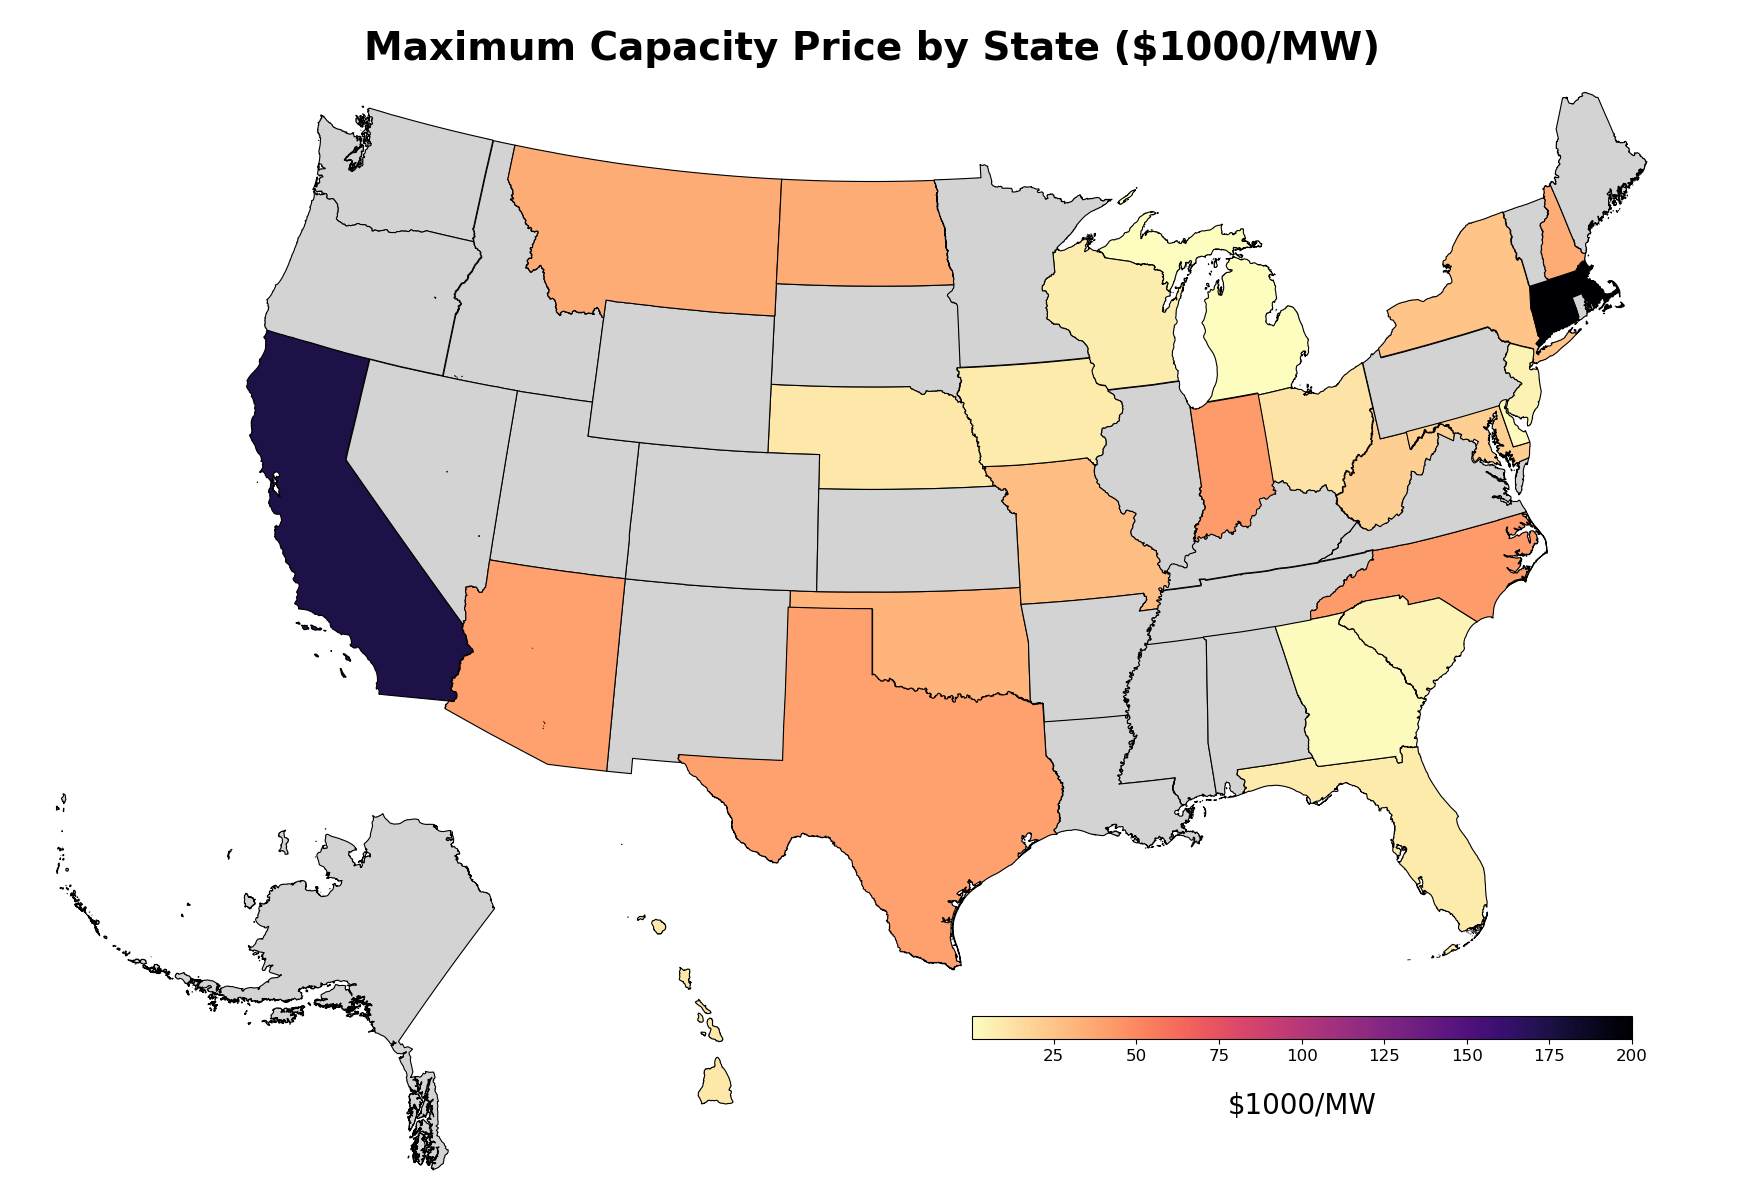

In [157]:
# CREATE MAPS

import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.colors as mcolors

file_path = r"C:\Users\juzzz\Downloads\cb_2018_us_state_500k\cb_2018_us_state_500k.shp"

# Check if the file exists (debugging)
if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")

try:
    us_states = gpd.read_file(file_path)

    # Remove territories
    us_states = us_states[us_states['STUSPS'].isin(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                                                    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                                                    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                                                    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                                                    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'])]

    merged_data = us_states.merge(result_with_all_states, left_on='STUSPS', right_on='state', how='left')

    # Calculate max price regardless of season
    merged_data['max_price'] = merged_data[['max_summer_price', 'max_winter_price']].max(axis=1)

    def makeColorColumn(gdf, variable, vmin, vmax, cmap='viridis'):
        """
        Assign colors to each row in the GeoDataFrame based on a variable.
        """
        norm = mcolors.Normalize(vmin=vmin, vmax=vmax, clip=True)
        mapper = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
        gdf['value_determined_color'] = gdf[variable].apply(lambda x: mcolors.to_hex(mapper.to_rgba(x)) if not np.isnan(x) else '#d3d3d3')  # Light gray for NaN values
        return gdf

    # Change scale
    merged_data['max_summer_price'] /= 1000
    merged_data['max_winter_price'] /= 1000
    merged_data['max_penalty'] /= 1000
    merged_data['max_price'] /= 1000

    def create_map(data, column, title, cmap='viridis'):
        # Set parameters
        variable = column
        vmin, vmax = data[column].min(), data[column].max()
        data = makeColorColumn(data, variable, vmin, vmax, cmap=cmap)

        # Create "visframe" as a re-projected GeoDataFrame using EPSG 2163 for CONUS
        visframe = data.to_crs({'init': 'epsg:2163'})

        # Create figure and axes for Matplotlib
        fig, ax = plt.subplots(1, figsize=(20, 12))
        ax.axis('off')

        from shapely.affinity import translate   

        # Plot CONUS states 
        for row in visframe.itertuples():
            if row.STUSPS not in ['AK', 'HI']:
                vf = visframe[visframe['STUSPS'] == row.STUSPS]
                c = data[data['STUSPS'] == row.STUSPS]['value_determined_color'].iloc[0]
                vf.plot(color=c, linewidth=0.8, ax=ax, edgecolor='black')
        
        # CONUS limits/positioning 
        ax.set_xlim(-2800000, 2800000)
        ax.set_ylim(-2800000, 1000000)

        # Add Alaska 
        alaska = visframe[visframe['STUSPS'] == "AK"].scale(xfact=0.50, yfact=0.50, origin=(0, 0))
        alaska = alaska.translate(xoff=-470000, yoff=-3500000)
        alaska.plot(color=data[data['STUSPS'] == "AK"]['value_determined_color'].iloc[0], linewidth=0.8, ax=ax, edgecolor='black')

        # Add Hawaii 
        hawaii = visframe[visframe['STUSPS'] == "HI"].scale(xfact=1, yfact=1, origin=(0, 0))
        hawaii = hawaii.translate(xoff=5000000, yoff=-1500000)
        hawaii.plot(color=data[data['STUSPS'] == "HI"]['value_determined_color'].iloc[0], linewidth=0.8, ax=ax, edgecolor='black')

        # Add title
        ax.set_title(f"{title} ($1000/MW)", fontsize=28, y=0.95, x=0.5, fontweight='bold')

        # Add legend
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cbar_ax = fig.add_axes([0.55, 0.13, 0.33, 0.0190])
        cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
        cbar.set_label("$1000/MW", rotation=0, labelpad=20, fontsize=20)
        cbar.ax.tick_params(labelsize=12)  # Adjust the font size (e.g., 16)

        plt.tight_layout()
        plt.show()

    # Create maps 
    create_map(merged_data, "max_summer_price", "Maximum Summer Capacity Price by State", cmap="magma_r")
    create_map(merged_data, "max_winter_price", "Maximum Winter Capacity Price by State", cmap="magma_r")
    create_map(merged_data, "max_penalty", "Maximum Penalty by State", cmap="magma_r")
    create_map(merged_data, "max_price", "Maximum Capacity Price by State", cmap="magma_r")

except Exception as e:
    print(f"Error: {str(e)}") #debugging
